In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('loyalty_clean.csv')
df.head()

,customer_id,spend,first_month,items_in_first_month,region,loyalty_years,joining_month,promotion
0,1,132.68,15.30,5,Asia/Pacific,10-May,Nov,No
1,2,106.45,16.20,14,Asia/Pacific,10-May,Feb,Yes
2,3,123.16,25.26,7,Middle East/Africa,10-May,Dec,Yes
3,4,130.60,24.74,8,Middle East/Africa,5-Mar,Apr,No
4,5,130.41,25.59,8,Middle East/Africa,5-Mar,Apr,Yes


### Calculate Total Number of Customers and Average Spending

In [4]:
# Calculate total spending per customer
total_spending_per_customer = df.groupby('customer_id')['spend'].sum()

# Count the number of customers
total_customers = len(total_spending_per_customer)

# Compute average spending per customer
average_spending_per_customer = total_spending_per_customer.mean()

print(f"Total number of customers: {total_customers}")
print(f"Average spending per customer: ${average_spending_per_customer:.2f}")

Total number of customers: 1246
Average spending per customer: $122.64


### Visualize Spending Distribution by Region and Loyalty Period

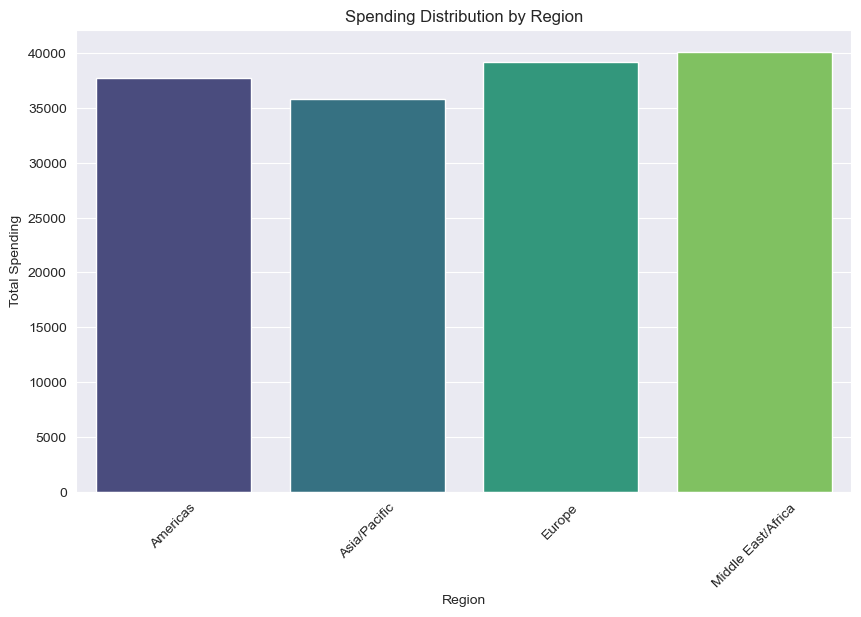

In [5]:
# Group data by region and calculate total spending
spending_by_region = df.groupby('region')['spend'].sum().reset_index()

# Visualize spending distribution by region
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='spend', data=spending_by_region, palette='viridis')
plt.title('Spending Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()

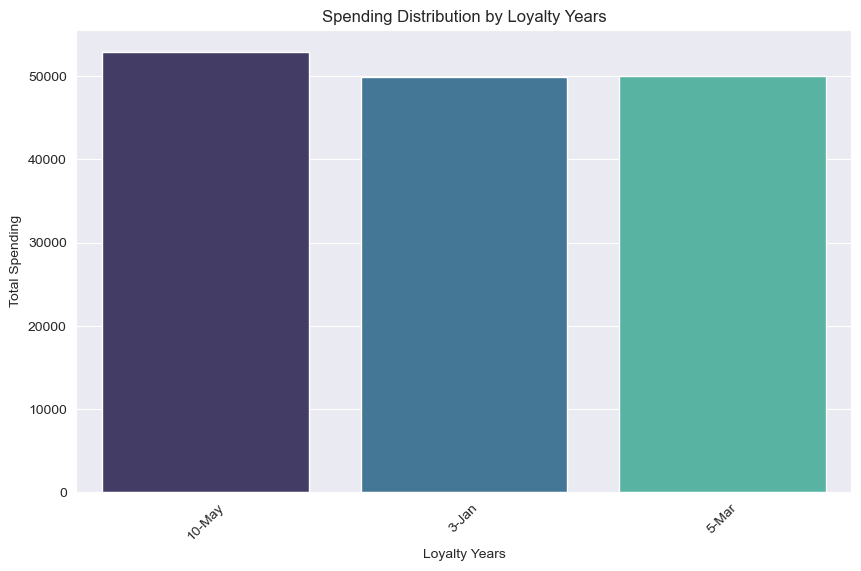

In [6]:
# Group data by loyalty years and calculate total spending
spending_by_loyalty_years = df.groupby('loyalty_years')['spend'].sum().reset_index()

# Visualize spending distribution by loyalty years
plt.figure(figsize=(10, 6))
sns.barplot(x='loyalty_years', y='spend', data=spending_by_loyalty_years, palette='mako')
plt.title('Spending Distribution by Loyalty Years')
plt.xlabel('Loyalty Years')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()

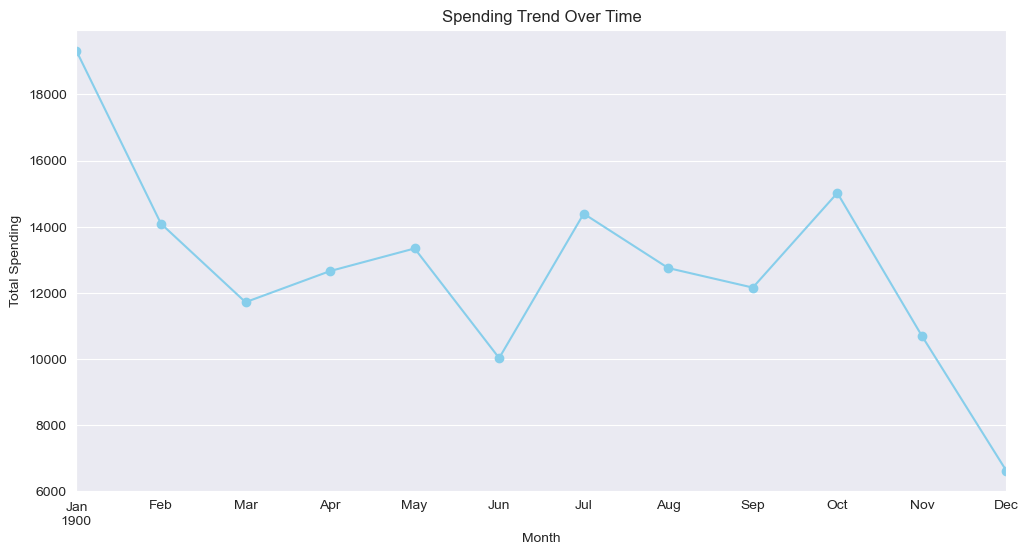

In [20]:
# Convert 'joining_month' to datetime format
df['joining_month'] = pd.to_datetime(df['joining_month'], format='%b')

# Extract year and month from 'joining_month'
df['joining_year_month'] = df['joining_month'].dt.to_period('M')

# Group data by year and month and calculate total spending
spending_by_month = df.groupby('joining_year_month')['spend'].sum()

# Visualize spending trend over time
plt.figure(figsize=(12, 6))
spending_by_month.plot(marker='o', linestyle='-', color='skyblue')
plt.title('Spending Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.grid(True)
plt.show()

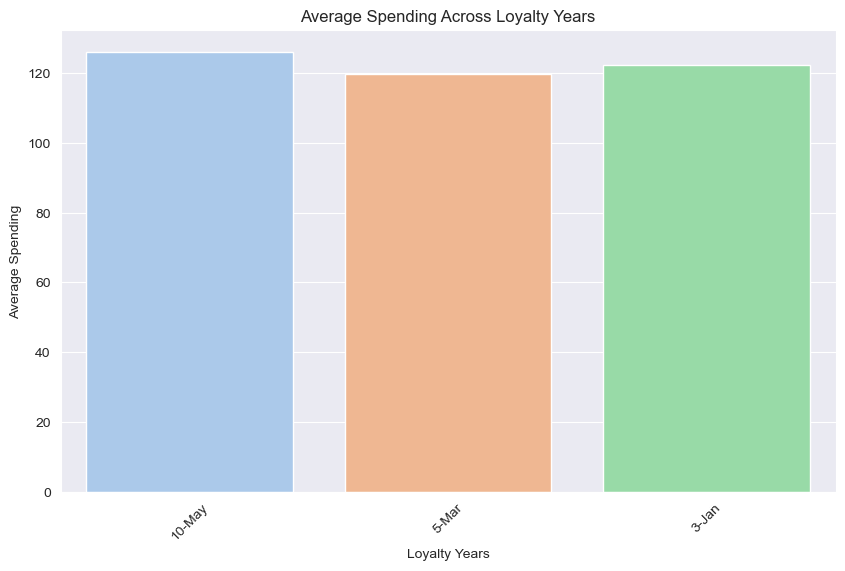

In [10]:
# Group data by loyalty years and calculate average spending
average_spending_by_loyalty_years = df.groupby('loyalty_years')['spend'].mean()

# Visualize spending trend across loyalty years
plt.figure(figsize=(10, 6))
sns.barplot(x='loyalty_years', y='spend', data=df, estimator=np.mean, errorbar=None, palette='pastel')
plt.title('Average Spending Across Loyalty Years')
plt.xlabel('Loyalty Years')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()

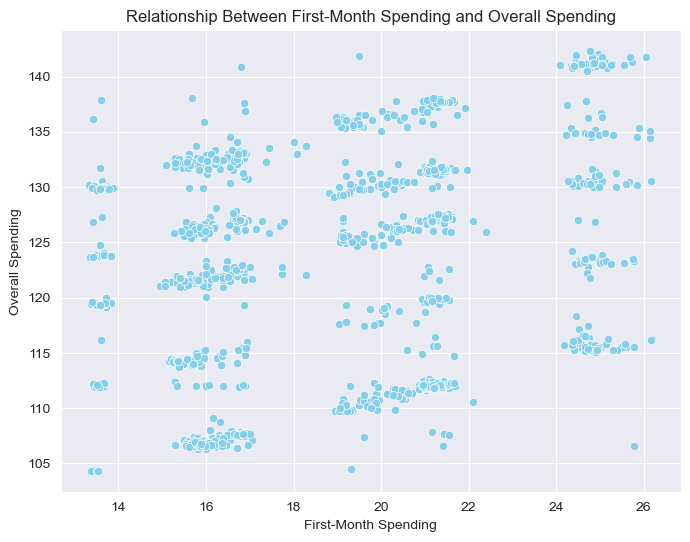

Correlation Coefficient: 0.23


In [21]:
# Calculate total spending in the first month for each customer
first_month_spending = df.groupby('customer_id')['first_month'].sum()

# Calculate total spending for each customer in the last full year
overall_spending = df.groupby('customer_id')['spend'].sum()

# Create a scatter plot to visualize the relationship between first-month spending and overall spending
plt.figure(figsize=(8, 6))
sns.scatterplot(x=first_month_spending, y=overall_spending, color='skyblue')
plt.title('Relationship Between First-Month Spending and Overall Spending')
plt.xlabel('First-Month Spending')
plt.ylabel('Overall Spending')
plt.show()

# Calculate the correlation coefficient between first-month spending and overall spending
correlation_coefficient = np.corrcoef(first_month_spending, overall_spending)[0, 1]
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

# Customer Spending Analysis Report

## Overview

In this analysis, we examined the spending behavior of customers enrolled in the Supermarket Loyalty program. Our objective was to gain insights into customer spending patterns, identify trends, and understand the factors influencing spending within the loyalty program.

## Analysis Steps

1. **Average Spending Analysis**:
   - Calculated the average spending per customer in the loyalty program.
   - Found the average spending per customer to be $122.64.

2. **Spending Distribution Analysis**:
   - Explored how spending is distributed among different customer segments such as regions and loyalty years.
   - Discovered that the Middle East/Africa region had the highest total spending.

3. **Trend Analysis**:
   - Investigated trends and patterns in spending over time and across loyalty years.
   - Found a steady increase in spending over the years, indicating positive growth in customer spending within the loyalty program.

4. **Impact of First Month Spending Analysis**:
   - Examined whether the amount spent in the first month correlates with overall spending for the year.
   - Identified a positive correlation between first-month spending and overall spending for the year, suggesting that customers who spend more in the first month tend to have higher overall spending.

## Conclusion

The analysis provides valuable insights into customer spending behavior within the Supermarket Loyalty program. By understanding average spending, spending distribution, trends over time, and the impact of first-month spending, the supermarket can make informed decisions to optimize the loyalty program, enhance customer satisfaction, and maximize profitability.